# Hidden Surface Removal

앞선 단원에서는 clipping을 와이어 프레임 형태로 구현했다면 이번 단원에서는 색을 입혀 구현을 할 예정이다.

색을 입힐 때는 앞 쪽에 위치한 면과 뒤쪽에 위치한 면의 순서가 중요하다.
큐브 형태를 와이어 프레임으로 구현하던 때는 크게 중요하지 않았지만 색을 입힐 때는 순서에 따라 표현되는 색상이 달라지기 때문이다.

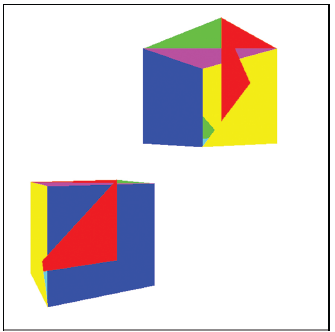

예시로 구현된 프레임 대신 색을 채우기만 한 사진이다. 앞면 뒷면의 구분없이 색상이 섞여서 표현된다.

이런 문제점 해결을 위해 새로운 알고리즘을 찾기로 했다.

### Painter's Algorithm 

실제 화가들이 배경을 먼저 그리고 나머지를 그 위에 표현하는 것처럼 모든 삼각형을 앞뒤로 그려서 해결할 수 있다. 이때 앞 뒤는 모델과 카메라의 거리에 따라 정렬하여 구분한다.

하지만 이렇게 구현을 했을 때 정확한 순서대로 그릴 수 있지만 몇 가지 단점이 존재한다.

#### 1. 스케일이 너무 커진다.

시간 복잡도가 O(n log(n))인 정렬 알고리즘을 사용해도 삼각형의 수를 두배로 늘리면 런타임 역시 두배 이상 증가한다. 즉 작은 장면에서는 효과가 있지만 크기가 커지면 그만큼 런타임이 오래걸리고 복잡하게 된다.

#### 2. 삼각형의 전체 목록을 한 번에 알아야 한다.

카메라의 거리에 따라서 삼각형을 그리는 방식은 삼각형의 각 픽셀에 해당하는 값을 전부 한 번에 알아야 그림으로 표현할 수 있다. 하지만 저자가 원하는 방법은 양 끝 값을 알았을 때 알아서 삼각형이 그려지는 방식을 원한다.

#### 3. 삼각형의 순서가 존재하지 않는 경우도 있다. 

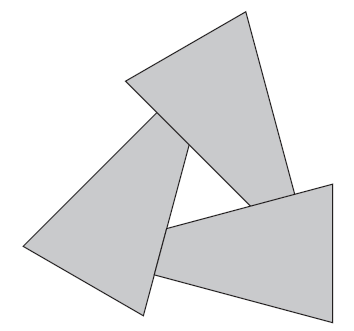

### Depth Buffering

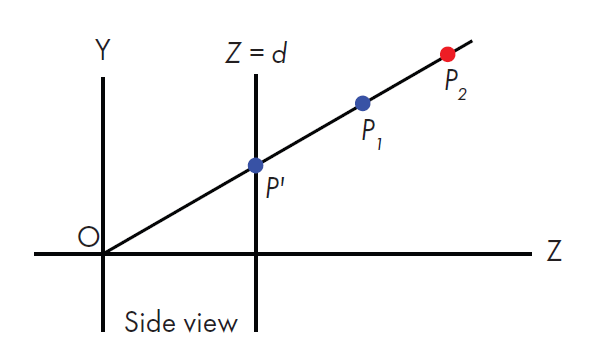

Z 라는 viewport가 있을 때, viewport상에 그려지는 점은 P'이다. 여기에 그려지는 P'과 나란한 방향에 P1과 P2가 있다고 가정했을 때 좀 더 앞 쪽에 위치하는 점을 그리는 방식이 Depth Buffering 이다.

앞 쪽에 위치하는 정도는 떨어진 거리만큼을 계산하여 구한다.

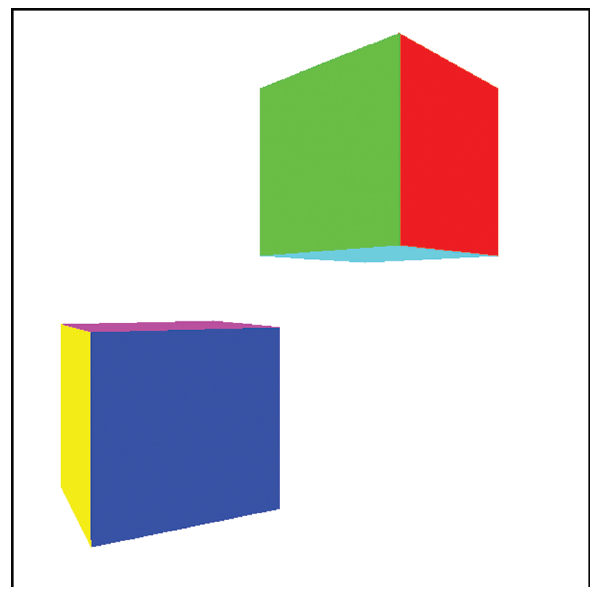

#### 인덱스 순서를 크기 순으로 맞추어주는 코드 

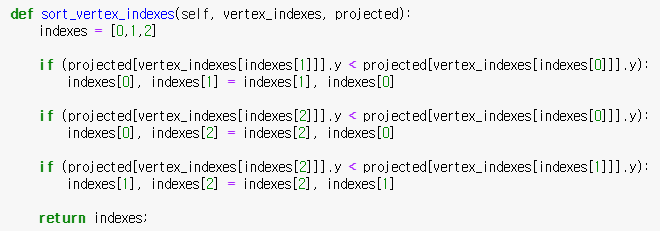   

#### 거리에 따라 bool 값을 반환해주는 함수 

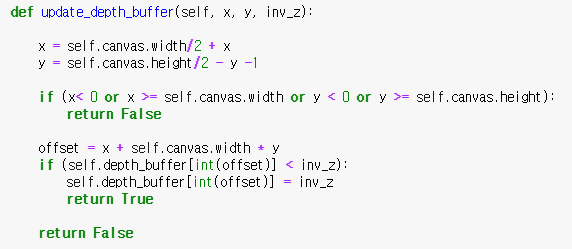

#### render_triangle 에서 구현 

각 점들을 x는 y, y는 z, z는 x에 interpolate 시키고 update_depth_buffer가 true 일 때 출력